A car following model where acceleration is based on distance from the car ahead


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
import time
import IPython.display as IP

We will use the Python package `solve_ivp` to solve the ODE. Here are the main parameters and returns of `solve_ivp`: 


`parameters:`

    fun    :      right-hand side of the system of the form fun(t, y)
    t_span :      2-tuple of floats of the interval of integration (t0, tf) 
    y0     :      initial state in array-like format (n,)
    args   :      optional, tuple of additional arguments to pass to the user-defined function
                  if fun has the form fun(t, y, a, b, c), we would have args = (a, b, c)
    
`returns: `

    t      :      time points 
    y      :      values of the solution at time t


For more information on `solve_ivp`, see the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">Python documentation</a>.

In [2]:
# the following defines the function on the right hand side of the ODE to be integrated 
def F(t, y, ncars): 
    '''
    Args
    
        t :     time 
        y :     population 
        ncars :     number cars
    '''
    
    # reading out the position and speeds of the cars from the y vector
    position = np.array(y[:ncars])
    
    speed = np.zeros((ncars,), dtype=np.float32)
    #speed[0] = 1. + np.random.normal()*0.01 # leading car velocity is prescribed and not part of the solution
    speed[0]=1.-0.2*t*np.exp(1-t) #leading car sees a police car
    speed[1:] = np.array(y[ncars:]) # the speeds of the following cars are given by the last ncar-1 component of the y vector
    
    # acceleration depends on inter-car spacing.  Assumes a normal spacing of 1
    acceleration = np.array(position[:ncars-1] - position[1:]) - 1.
    
    dydt = np.zeros((2*ncars-1,), dtype=np.float32())
    dydt[:ncars] = speed
    dydt[ncars:] = acceleration
    
    
    return dydt

In [3]:
# initial condition
ncars = 10
t_sim = 20. # total simulation time 
y0 = np.ones((2*ncars-1,), dtype=np.float32())
y0[:ncars,] = np.array(range(ncars, 0, -1), dtype=np.float32())  

# integrate using solve_ivp
sol = solve_ivp(F, [0, t_sim], y0, args = [ncars], max_step = 1.)

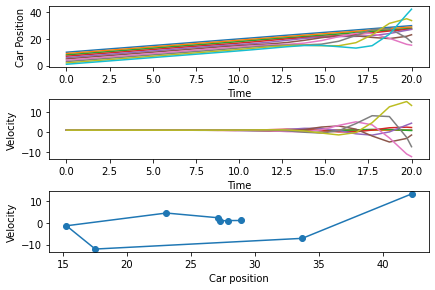

In [23]:
fig, axs = plt.subplots(3)
fig.tight_layout() 

for i in range(np.size(sol.t)):
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    
    for car in range(ncars): 
        axs[0].plot(sol.t, sol.y[car, :])
    axs[0].set(xlabel='Time', ylabel='Car Position')

    for car in range(ncars-1):
        axs[1].plot(sol.t, sol.y[ncars+car,:])
    axs[1].set(xlabel='Time', ylabel='Velocity')
    
    axs[2].plot(sol.y[1:ncars,i], sol.y[ncars:,i], '-o')
    axs[2].set(xlabel='Car position', ylabel='Velocity')
    axs[2].set_ylim(0, 2)
    IP.display(fig)
    
    IP.clear_output(wait = True)
    plt.pause(0.1)